In [1]:
library('gdata')
library('plyr')
library('tibble')
library('tidyr')
library('dplyr')
library('reshape')

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:gdata’:

    combine, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths

The following objects are masked from ‘package:

# Importation données energie

In [2]:
df_energie <- as.data.frame(read.xls('../fichiers_csv/energie.xls'))
colnames(df_energie)
df_energie$Mois <- as.vector(df_energie$Mois)
df_energie$Qualite <- as.vector(df_energie$Qualite)
df_energie$Territoire <- as.vector(df_energie$Territoire)

str(df_energie)


[1] "Mois"                                    
 [2] "Qualite"                                 
 [3] "Territoire"                              
 [4] "Production.totale"                       
 [5] "Production.nucleaire"                    
 [6] "Production.thermique.totale"             
 [7] "Production.thermique.charbon"            
 [8] "Production.thermique.fioul"              
 [9] "Production.thermique.gaz"                
[10] "Production.hydraulique"                  
[11] "Production.eolien"                       
[12] "Production.solaire"                      
[13] "Production.bio.energies"                 
[14] "Consommation.totale"                     
[15] "Solde.exportateur"                       
[16] "Echanges.export"                         
[17] "Echanges.import"                         
[18] "Echanges.avec.le.Royaume.uni"            
[19] "Echanges.avec.l.Espagne"                 
[20] "Echanges.avec.l.Italie"                  
[21] "Echanges.aves.la.Suisse"                 
[22] "Echanges.avec.l.Allemagne.et.la.Belgique"

'data.frame':	855 obs. of  22 variables:
 $ Mois                                    : chr  "2010-01" "2010-02" "2010-03" "2010-04" ...
 $ Qualite                                 : chr  "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" ...
 $ Territoire                              : chr  "France" "France" "France" "France" ...
 $ Production.totale                       : int  56542 50406 51071 41693 39847 40217 41064 39499 39218 42116 ...
 $ Production.nucleaire                    : int  40313 36316 35984 31294 29372 29575 31744 32391 31657 31885 ...
 $ Production.thermique.totale             : int  8801 6822 7250 3568 2843 2366 2953 1580 2965 4713 ...
 $ Production.thermique.charbon            : int  2928 1893 1994 1489 1097 681 1056 249 1226 1831 ...
 $ Production.thermique.fioul              : int  1690 1175 1275 612 504 463 511 424 502 896 ...
 $ Production.thermique.gaz                : int  4184 3754 3981 1467 1242 1223 1386 907 1236 1986 ...

In [3]:
df_energie <- df_energie %>% 
  select(Mois, Territoire, Consommation.totale) %>%
  filter(Territoire == "France")

In [4]:
mois = rep(c('JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC'),8)
annee = c(rep('2010',12),rep('2011',12),rep('2012',12),rep('2013',12),rep('2014',12),rep('2015',12),rep('2016',12),rep('2017',12))

In [5]:
df_energie <- df_energie[1:96,]
df_energie <- cbind.data.frame(df_energie,mois,annee)
df_energie$mois <- as.vector(df_energie$mois)
df_energie$annee <- as.vector(df_energie$annee)


In [6]:
df_energie <- df_energie[,c("annee", "mois", "Consommation.totale", "Mois","Territoire")]

In [7]:
df_energie <- cast(df_energie,annee ~ mois,value='Consommation.totale',sum)
df_energie <- df_energie[,c("annee", 'JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC')]

In [8]:
df_energie

annee,JAN,FEV,MAR,AVR,MAI,JUIN,JUIL,AOUT,SEP,OCT,NOV,DEC
2010,56342,48698,48294,38637,37284,34567,36031,33069,35104,40918,46532,57600
2011,53873,45937,45543,35442,35107,33771,34204,32625,34230,37977,41837,48241
2012,51086,54476,43156,40176,35257,33219,34141,32247,33269,38628,44260,49602
2013,53619,49639,49480,40292,36821,32973,34751,31591,33195,37063,45310,50108
2014,49359,44580,43104,36331,34695,32608,33935,31004,33266,36301,40617,49350
2015,52536,48676,45739,36898,33927,33256,34912,31603,33521,39170,41085,44727
2016,50161,46440,47270,39102,34746,32852,33718,32132,33245,38590,44293,50670
2017,57434,43923,42734,36669,35048,33396,33905,32125,33653,36625,44920,51549


# Importation données météo

In [9]:
files_to_read <- list.files(path = '../fichiers_csv/meteo_data',full.names = TRUE)


In [10]:

liste_meteo <- lapply(files_to_read,function(i){
    list_csv <- read.xls(i)

    
})

In [11]:
df_meteo <- lapply(liste_meteo,function(i){
    a <- data.frame(i,stringsAsFactors = FALSE)

station <- as.vector(a[1,'X.1'])

mat <- as.matrix(a)
mat <- mat[-c(1,2,3,4,5,6,7),]
colnames(mat) <- mat[1,]
mat <- mat[-1,]
colnames(mat)[1] <- 'Annee'
nb_row <- length(mat[,'Annee'])
mat<- cbind(rep(station,nb_row),mat)
colnames(mat)[1] <- 'Station'
as.data.frame(mat,stringsAsFactors = FALSE)
mat[1:7,] #Valeur manquantes en 2017
})

In [12]:
df_base_meteo <- ldply(df_meteo, rbind)
df_base_meteo <- rename(df_base_meteo,c('Station' = 'station','Annee'='annee','JAN'='JAN','F\xc9V'='FEV','MAR'='MAR','AVR'='AVR','MAI'='MAI','JUN'='JUN','JUI'='JUI','AO\xdb'='AOU','SEP'='SEP','OCT'='OCT','NOV'='NOV','D\xc9C'='DEC','Total'='total'))


In [13]:
df_base_meteo[] <- as.vector(unlist(df_base_meteo, use.names = FALSE))
df_base_meteo[-2] <- as.numeric(unlist(df_base_meteo[-2], use.names = FALSE))

Warning message in eval(expr, envir, enclos):
“NAs introduits lors de la conversion automatique”

In [14]:
df_base_meteo <- ddply(df_base_meteo,~annee,summarise, JAN = mean(JAN),
      FEV = mean(FEV),
      MAR = mean(MAR),
      AVR = mean(AVR),
MAI = mean(MAI),
JUN = mean(JUN),
JUI = mean(JUI),
AOU = mean(AOU),
SEP = mean(SEP),
OCT = mean(OCT),
NOV = mean(NOV),
DEC = mean(DEC))


In [15]:
df_base_meteo

annee,JAN,FEV,MAR,AVR,MAI,JUN,JUI,AOU,SEP,OCT,NOV,DEC
2010,484.9267,369.9756,317.2278,189.6422,154.08889,40.69889,5.656667,22.85444,75.07222,184.95667,303.3189,478.8556
2011,406.2789,313.8867,273.3411,121.5056,70.45333,46.10111,32.323333,19.43889,32.31667,136.76111,220.3189,326.8511
2012,373.1278,478.2522,245.1367,237.8778,103.84111,41.35444,24.552222,8.21000,67.81889,152.04111,282.9667,363.1200
2013,429.6233,413.0800,353.4844,231.2144,186.51889,61.25778,5.921111,13.47556,53.80667,112.49667,321.7444,379.1200
2014,341.1244,302.5311,274.3767,171.0933,130.10000,30.49000,15.743333,32.52667,35.64222,96.57444,221.9400,384.3467
2015,406.9656,387.6867,296.7800,180.4811,107.18111,27.36556,11.420000,13.06667,85.59333,189.47000,223.8689,279.3678
2016,361.8989,329.3178,334.9833,229.5767,121.88111,39.40111,14.776667,11.26111,28.29556,190.01556,292.3822,401.0267


# Série temporelles

## Conso d'energie

In [55]:
df_energie_ts <- ts(as.vector(as.matrix(df_energie[-1])),start=c(2010,1),frequency = 12)
log_df_energie_ts = log(df_energie_ts)

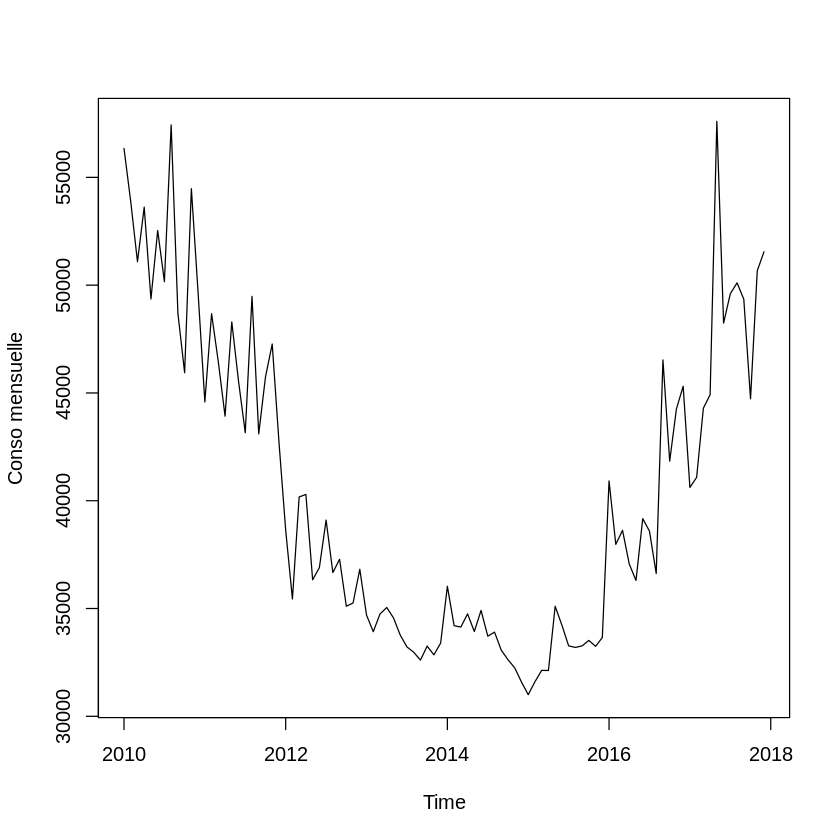

In [51]:
plot(df_energie_ts,ylab='Conso mensuelle')

# Effet meteo dju

In [54]:
df_base_meteo_ts <- ts(as.vector(as.matrix(df_base_meteo[-1])),start=c(2010,1),frequency = 12)
log_df_base_meteo_ts = log(df_base_meteo_ts)

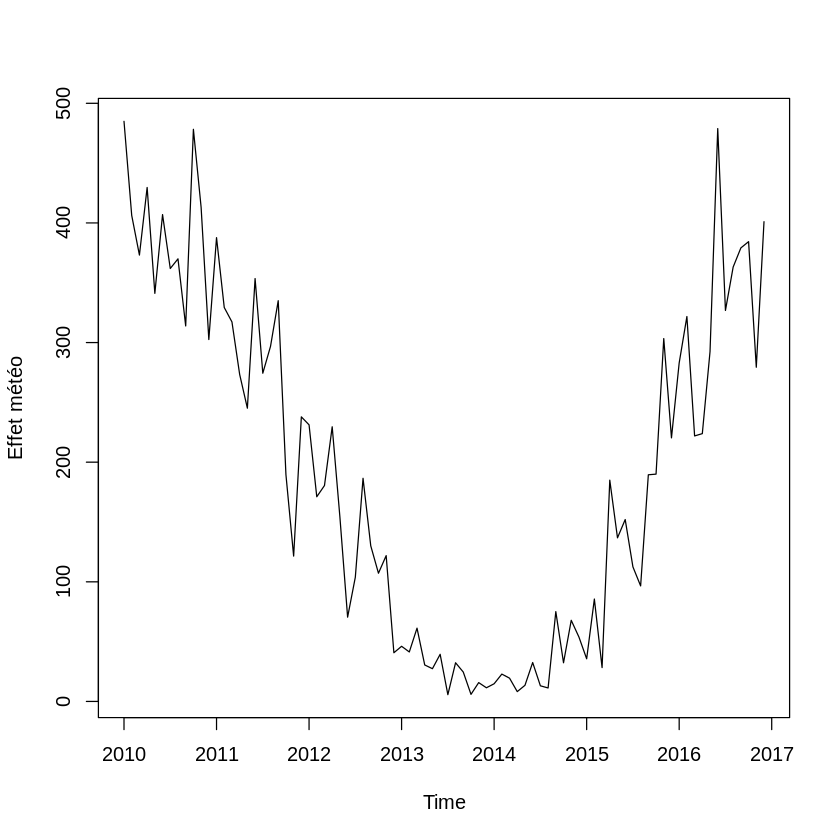

In [53]:
plot(df_base_meteo_ts,ylab='Effet météo')

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [58]:
## Il faut décomposer la tendance et la saisonnalité dans des bases que l'on pourra estimer par régression lin

# Création de la base tendancielle et saisonnière
## Base tendancielle 
t=1:84




In [61]:
t

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77 78 79 80 81 82 83 84

In [59]:
## Base saisonnière
### On va crée 12 indicatrices qui vont contenir des 1 sur chacun des mois

for (i in 1:12)
{
  su=rep(0,times=12)
  su[i]=1
  s=rep(su,times=12)
  assign(paste("s",i,sep=""),s)
}



In [ ]:
# On effectue la régression linéaire (le modèle a été transformé afin de palier au prob de colinéarité) sur la série Yt
## Note : Colinéarité = En algèbre linéaire, deux vecteurs u et v d'un espace vectoriel E sont colinéaires s'il existe un scalaire k tel que u = kv ou v = ku. 
reg=lm(y~t+s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12-1)
summary(reg)

## Affichage des coefficients
reg$coefficients

## Coefficients initiaux
a=mean(reg$coefficients[2:13])
b=reg$coefficients[1]
c=reg$coefficients[2:13]-mean(reg$coefficients[2:13])



In [ ]:
# On calcule la série corrigée des variations saisonnières (en n'oubliant pas de passer à l'exponentiel pour revenir à Xt)
y_cvs=y-(c[1]*s1+c[2]*s2+c[3]*s3+c[4]*s4+c[5]*s5+c[6]*s6+c[7]*s7+c[8]*s8+c[9]*s9+c[10]*s10+c[11]*s11+c[12]*s12)

x_cvs=exp(y_cvs)

ts.plot(x,x_cvs,xlab='t',ylab='Airpass',col=c(1,2),lwd=c(1,2))
legend('topleft',legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))

# Mission 2 : Effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.

In [ ]:
# Désaisonnaliser une série temporelle à l'aide des moyennes mobile (alogrithme x11)
# Il y a deux phases de 4 étapes. Chaque phase donne une St corrigée.

## Etape 1 : Primo-estimation de la tendance
m2_12=function(x){
  y=(1/12)*filter(x,c(0.5,rep(1,times=11),0.5))
  return(y)
}
t1=m2_12(y)

## Primo-estimation de la somme composante saisonnière-perturbation
sig1=y-t1

## Primo-estimation de la composante saisonnière
m3=function(x){
  
  y=(1/3)*filter(x,rep(1,times=3))
  
  return(y)
  
}
s1=m3(m3(sig1))
shat1=s1-m2_12(s1)
## Primo-estimation de la série corrigée des variations saisonnières
ycvs1=y-shat1
xcvs1=exp(ycvs1)

ts.plot(x,xcvs1,col=c(1,2),lwd=c(1,2))

legend("topleft",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))

# Fin de la phase 1 et debut de la phase 2
## Etape 1 : Estimation définitive de la tendance
m13h=function(x){
  
  y=(1/16796)*filter(x,c(-325,-468,0,1100,2475,3600,4032,3600,2475,1100,0,-468,-325))
  
  return(y)
  
}

t2=m13h(xcvs1)
## Etape 2 : Estimation définitive de la somme composante saisonnière-perturbation (2)
sig2=y-t2

## Etape 3 : Estimation définitive de la composante saisonnière
m5=function(x){
  y=(1/5)*filter(x,rep(1,times=5))
  return(y)
}
s2=m3(m5(sig2))
shat2=s2-m2_12(s2)

## Estimation définitive de la série corrigée des variations saisonnières
ycvs2=y-shat2
xcvs2=exp(ycvs2)

ts.plot(x,xcvs2,col=c(1,2),lwd=c(1,2))

legend("topleft",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))
